<h1 style= "color:#9370DB;"> Quest IronRegression</h1>

In [1]:
# 📚 Libraries 
import kagglehub
import pandas as pd
import numpy as np
import os

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as g

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

<h2 style="color: #9370DB;"> 01 | 💾 Data Extraction </h2>

In [2]:
# Download latest version
path = kagglehub.dataset_download("minasameh55/king-country-houses-aa")

In [3]:
# Print all files in the dataset path
print(os.listdir(path))

['king_ country_ houses_aa.csv']


In [4]:
csv_file_path = os.path.join(path, 'king_ country_ houses_aa.csv')
data = pd.read_csv(csv_file_path)

<h3 style="color: #4169E1;">1.1 | Exploring the Data </h3>

In [5]:
data.head(0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [6]:
data.shape

(21613, 21)

**First impression:**

_____________


- id: A unique identifier for a house.
- date: The date on which the house was sold.
- price: The sale price of the house (prediction target).
- bedrooms: Number of bedrooms in the house.
- bathrooms: Number of bathrooms in the house, per bedroom.
- sqft_living: Square footage of the interior living space.
- sqft_lot: Square footage of the land space.
- floors: Number of floors (levels) in the house.
- waterfront: Whether the house has a waterfront view.
- view: Number of times the house has been viewed.
- condition: The overall condition of the house.
- grade: The overall grade given to the house, based on the King County grading system.
- sqft_above: Square footage of the house apart from the basement.
- sqft_basement: Square footage of the basement.
- yr_built: The year the house was built.
- yr_renovated: The year the house was renovated.
- zipcode: ZIP code area.
- lat: Latitude coordinate.
- long: Longitude coordinate.
- sqft_living15: The interior living space for the nearest 15 neighbors in 2015.
- sqft_lot15: The land spaces for the nearest 15 neighbors in 2015.
- TARGET --> Price: Our primary focus is to understand which features most significantly impact the house price. Additionally, we aim to explore properties valued at $650K and above for more detailed insights.

_____________

Insights: 

<h3 style="color: #4169E1;">1.2 | Copies</h3>

In [7]:
df= data.copy()

In [8]:
# Specially with cotinious value do the Correlation. And we do have many int.
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<h2 style="color: #9370DB;"> 02 | Data Cleaning </h2>

<h3 style="color: #4169E1;"> 2.1 | Dealing with Data types</h3>

In [9]:
#Drop Data
df.drop(columns='date', inplace=True)
df.head(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [ ]:
#format date
# df["date"] = pd.to_datetime(df["date"])

In [10]:
df.set_index("id", inplace=True)

In [11]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15','price']

In [ ]:
# Restructure columns. Took out some features. Prueba
# cols = ['bedrooms', 'bathrooms','sqft_living', 'sqft_lot',
#      'floors', 'waterfront', 'view', 'condition', 'grade',
 # #     'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'price']

In [13]:
df = df[cols]
df.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [14]:
df.shape

(21613, 19)

In [ ]:
# Not run 
# df = df[df['price'] >= 650000]

<h3 style="color: #4169E1;"> 2.2 | Dealing with NaN values</h3>

In [15]:
df.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

<h3 style="color: #4169E1;"> 2.3 | Dealing with Duplicates</h3>

In [16]:
df.duplicated().sum()

5

<h3 style="color: #4169E1;"> 2.4 | Dealing with Empty Spaces</h3>

In [ ]:
df.eq(" ").sum()

<h3 style="color: #4169E1;"> 2.5 | Dealing with outliers</h3>

In [17]:
def outlier_slayer(data, column): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [18]:
df = outlier_slayer(df, "price")

<h2 style="color: #9370DB;"> 03 | EDA (Exploratory Data Analysis) </h2>

<h3 style="color: #4169E1;">3.1 | Descriptive Statistics </h3>

In [ ]:
df.describe().T

In [ ]:
df.shape

<h3 style="color: #4169E1;"> 3.2 | Checking Distributions</h3>

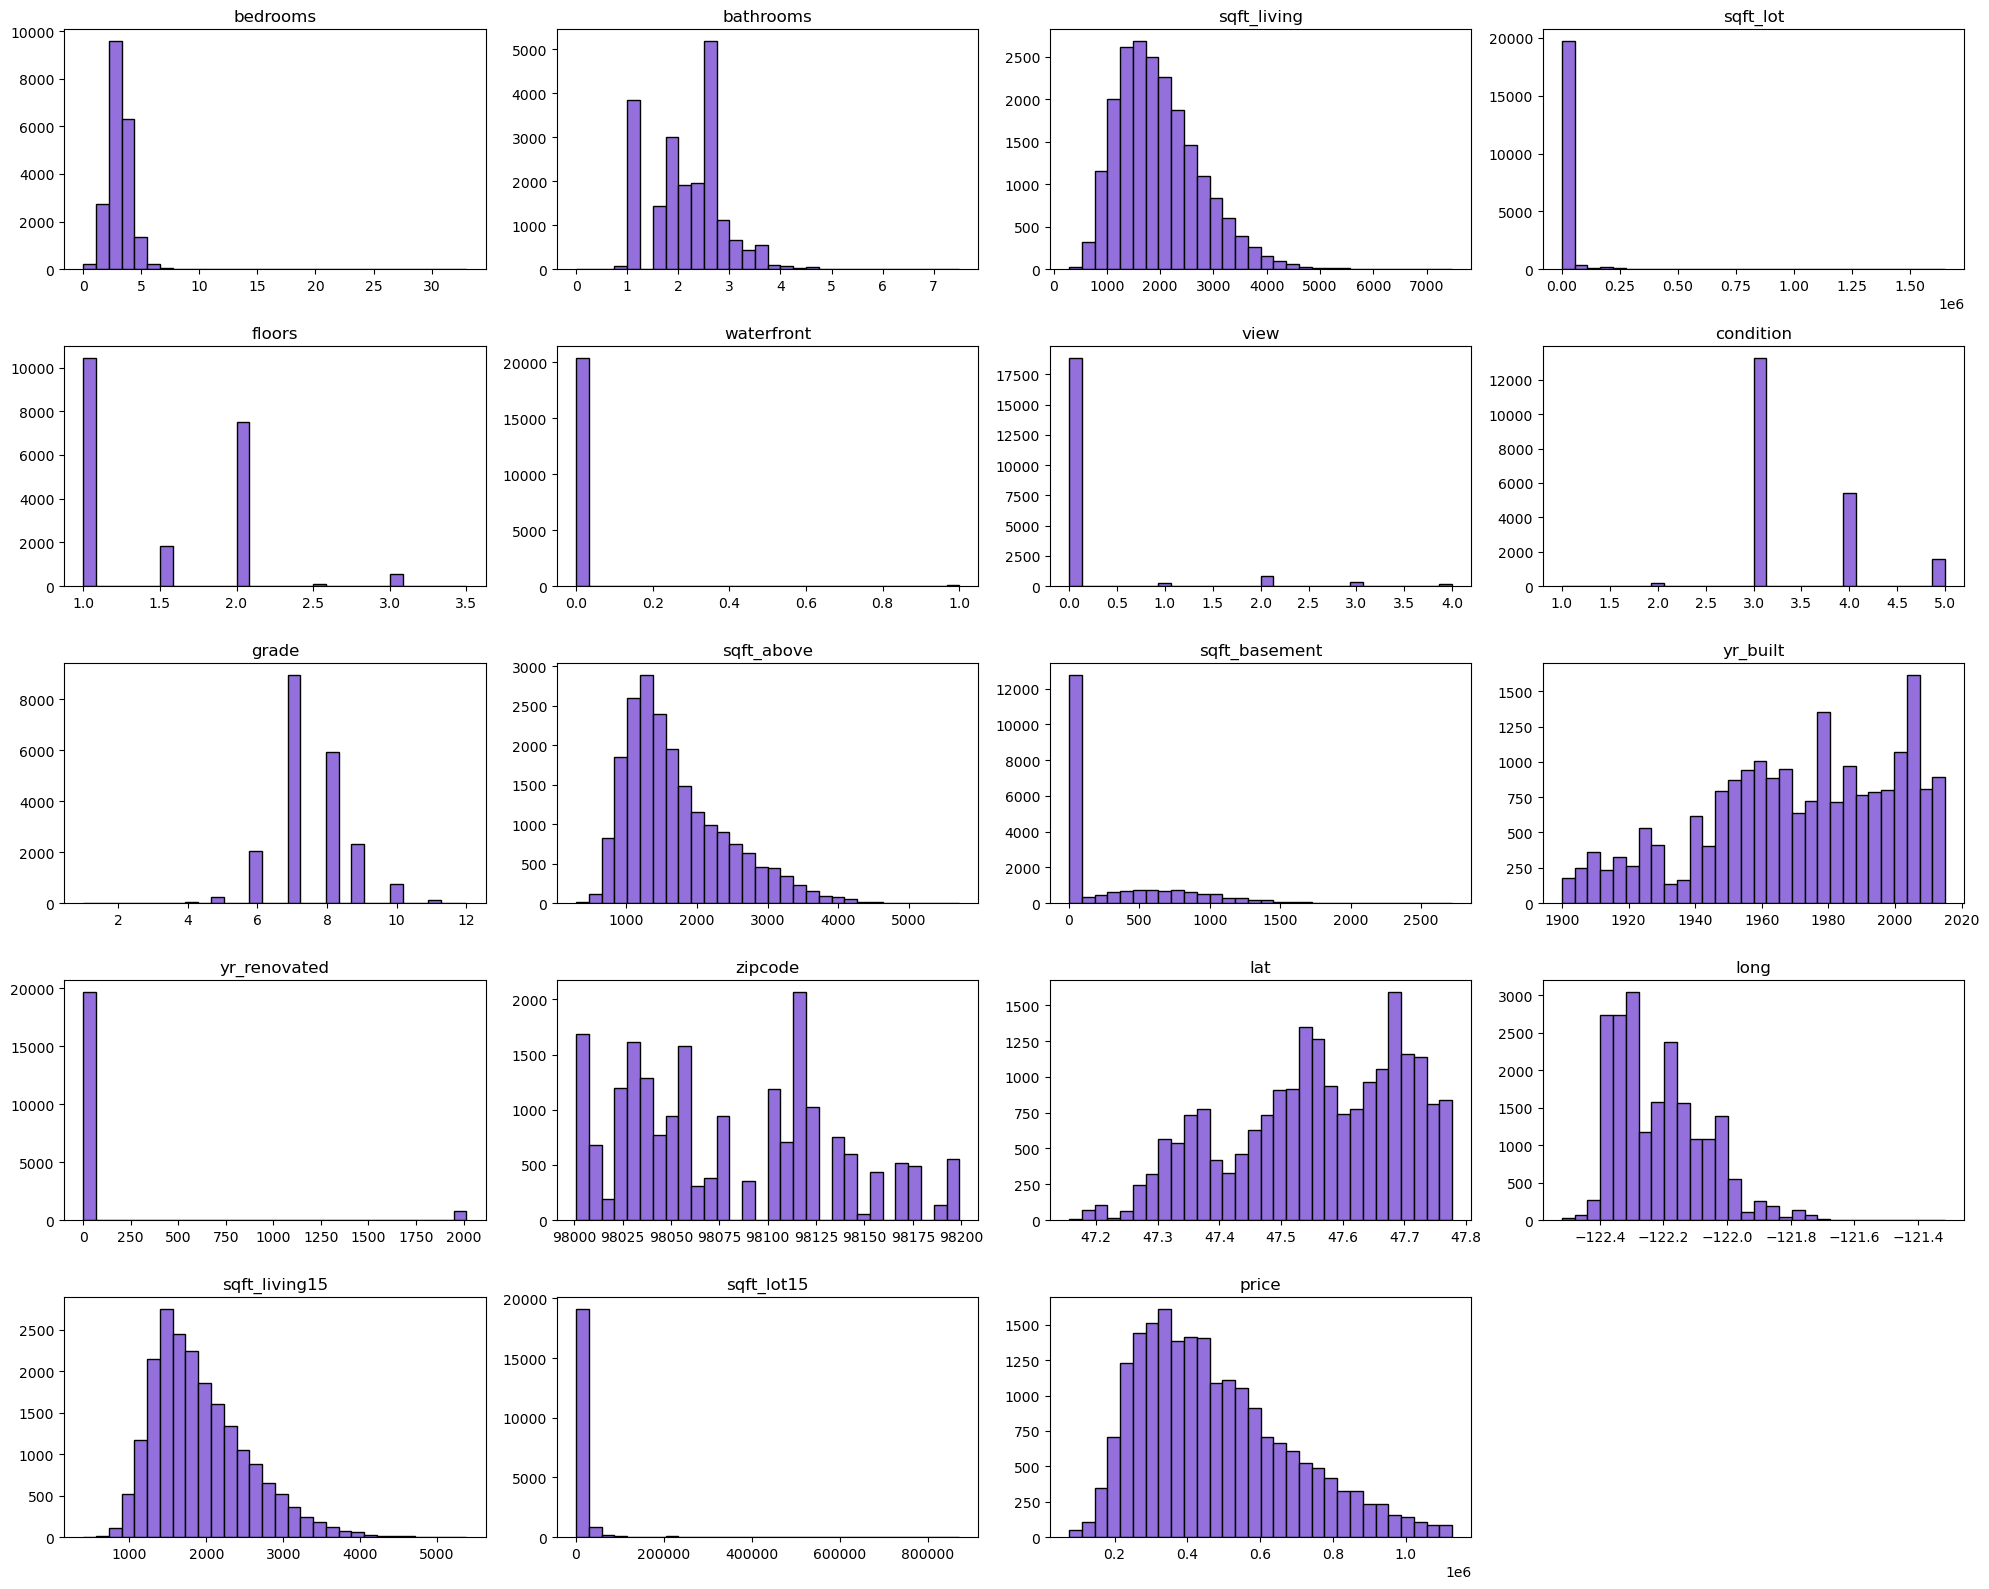

In [19]:
color = '#9370DB'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

<h3 style="color: #4169E1;"> 3.3 | Checking our target distribution</h3>

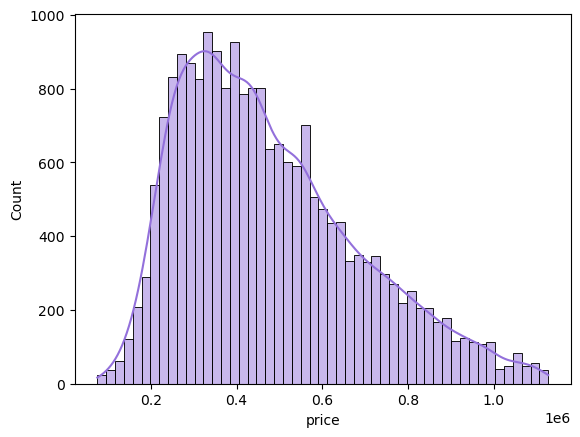

In [20]:
# Without the filter 650.000 and taking out the outliers. 
sns.histplot(df["price"], color=color, kde=True);

<h3 style="color: #4169E1;">3.4 | Checking Outliers </h3>

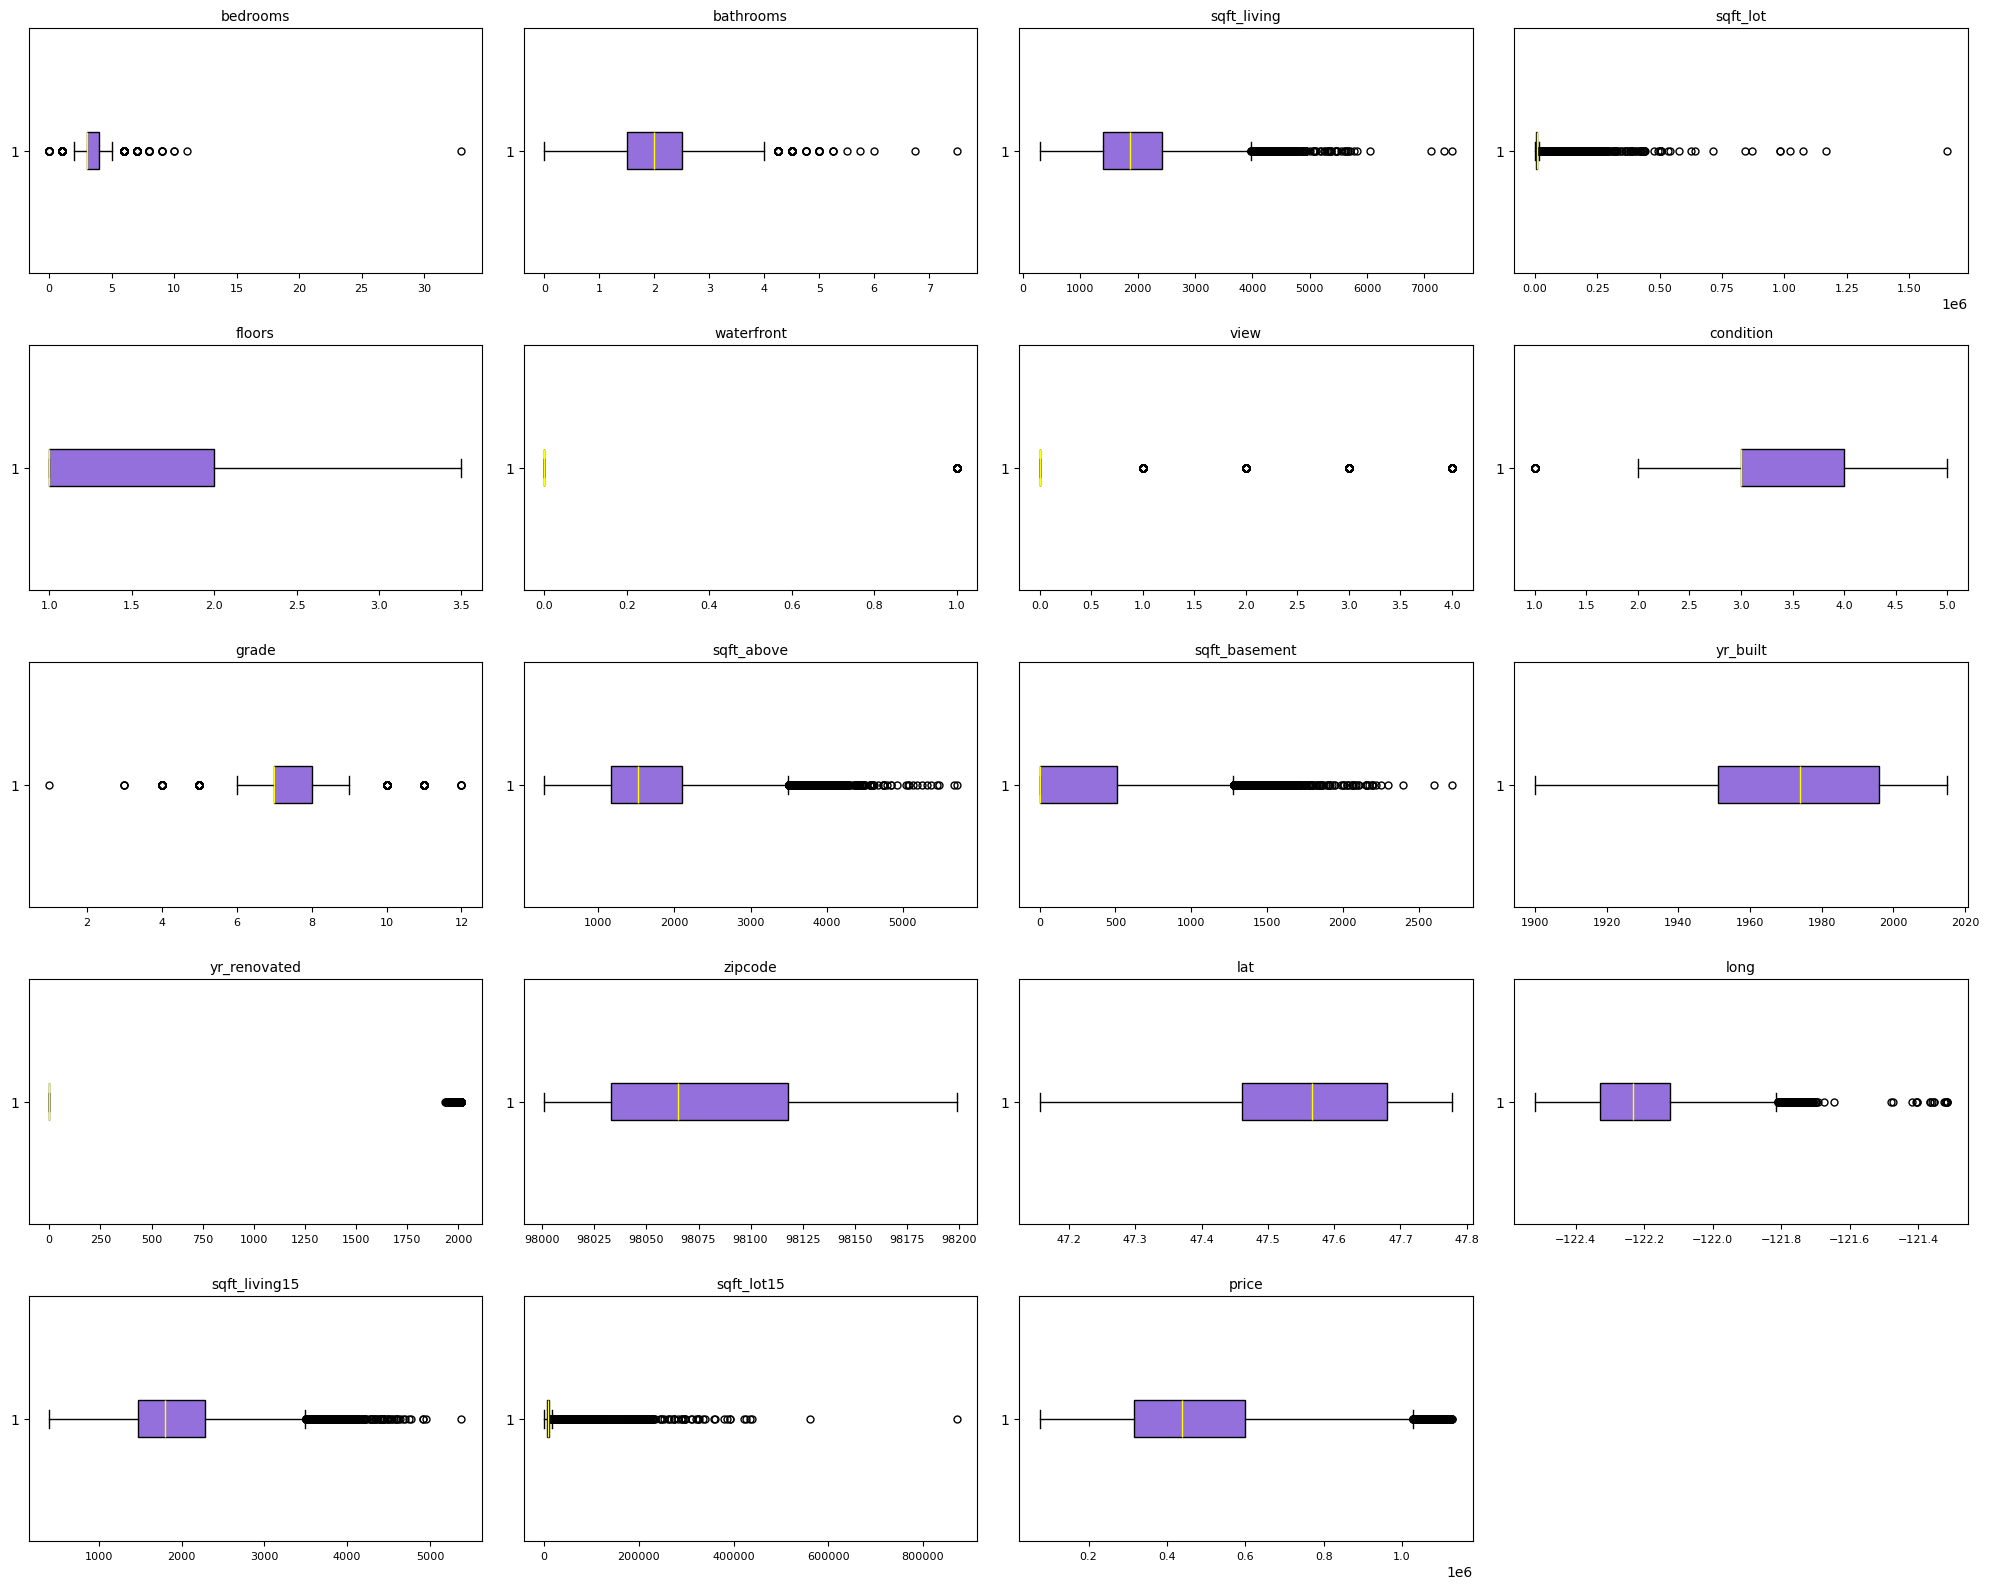

In [21]:
color = '#9370DB'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [ ]:
df[['price']].describe().T.round(2)

<h3 style="color: #4169E1;">3.5 | Looking for Correlations </h3>

In [22]:
df.corrwith(df["price"]).sort_values(ascending=False)

price            1.000000
grade            0.631182
sqft_living      0.622333
sqft_living15    0.562090
sqft_above       0.530451
bathrooms        0.455927
lat              0.430762
bedrooms         0.296956
floors           0.273987
view             0.238268
sqft_basement    0.235701
sqft_lot         0.093950
yr_renovated     0.083601
sqft_lot15       0.082420
long             0.070863
yr_built         0.061144
waterfront       0.051449
condition        0.038275
zipcode         -0.018511
dtype: float64

In [23]:
num_corr = round(df.corr(), 2)
num_corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
bedrooms,1.00,0.49,0.58,0.02,0.15,-0.03,0.04,0.03,0.32,0.46,0.28,0.16,0.00,-0.15,-0.03,0.14,0.37,0.02,0.30
bathrooms,0.49,1.00,0.72,0.06,0.50,-0.00,0.10,-0.14,0.61,0.64,0.22,0.54,0.03,-0.21,-0.01,0.25,0.53,0.06,0.46
sqft_living,0.58,0.72,1.00,0.16,0.34,0.00,0.17,-0.07,0.71,0.85,0.38,0.35,0.02,-0.20,0.01,0.29,0.74,0.17,0.62
sqft_lot,0.02,0.06,0.16,1.00,-0.02,0.02,0.08,-0.00,0.09,0.16,0.01,0.04,0.01,-0.13,-0.10,0.22,0.14,0.71,0.09
floors,0.15,0.50,0.34,-0.02,1.00,-0.00,-0.01,-0.28,0.46,0.53,-0.29,0.51,-0.00,-0.06,0.04,0.13,0.27,-0.02,0.27
waterfront,-0.03,-0.00,0.00,0.02,-0.00,1.00,0.29,0.01,-0.01,-0.01,0.01,-0.04,0.06,0.04,-0.05,-0.06,0.00,0.03,0.05
view,0.04,0.10,0.17,0.08,-0.01,0.29,1.00,0.03,0.13,0.07,0.20,-0.07,0.06,0.10,-0.03,-0.08,0.19,0.08,0.24
condition,0.03,-0.14,-0.07,-0.00,-0.28,0.01,0.03,1.00,-0.17,-0.18,0.18,-0.35,-0.06,-0.01,-0.02,-0.10,-0.12,0.00,0.04
grade,0.32,0.61,0.71,0.09,0.46,-0.01,0.13,-0.17,1.00,0.71,0.07,0.49,-0.02,-0.18,0.09,0.23,0.67,0.10,0.63
sqft_above,0.46,0.64,0.85,0.16,0.53,-0.01,0.07,-0.18,0.71,1.00,-0.16,0.46,-0.00,-0.27,-0.04,0.39,0.72,0.18,0.53


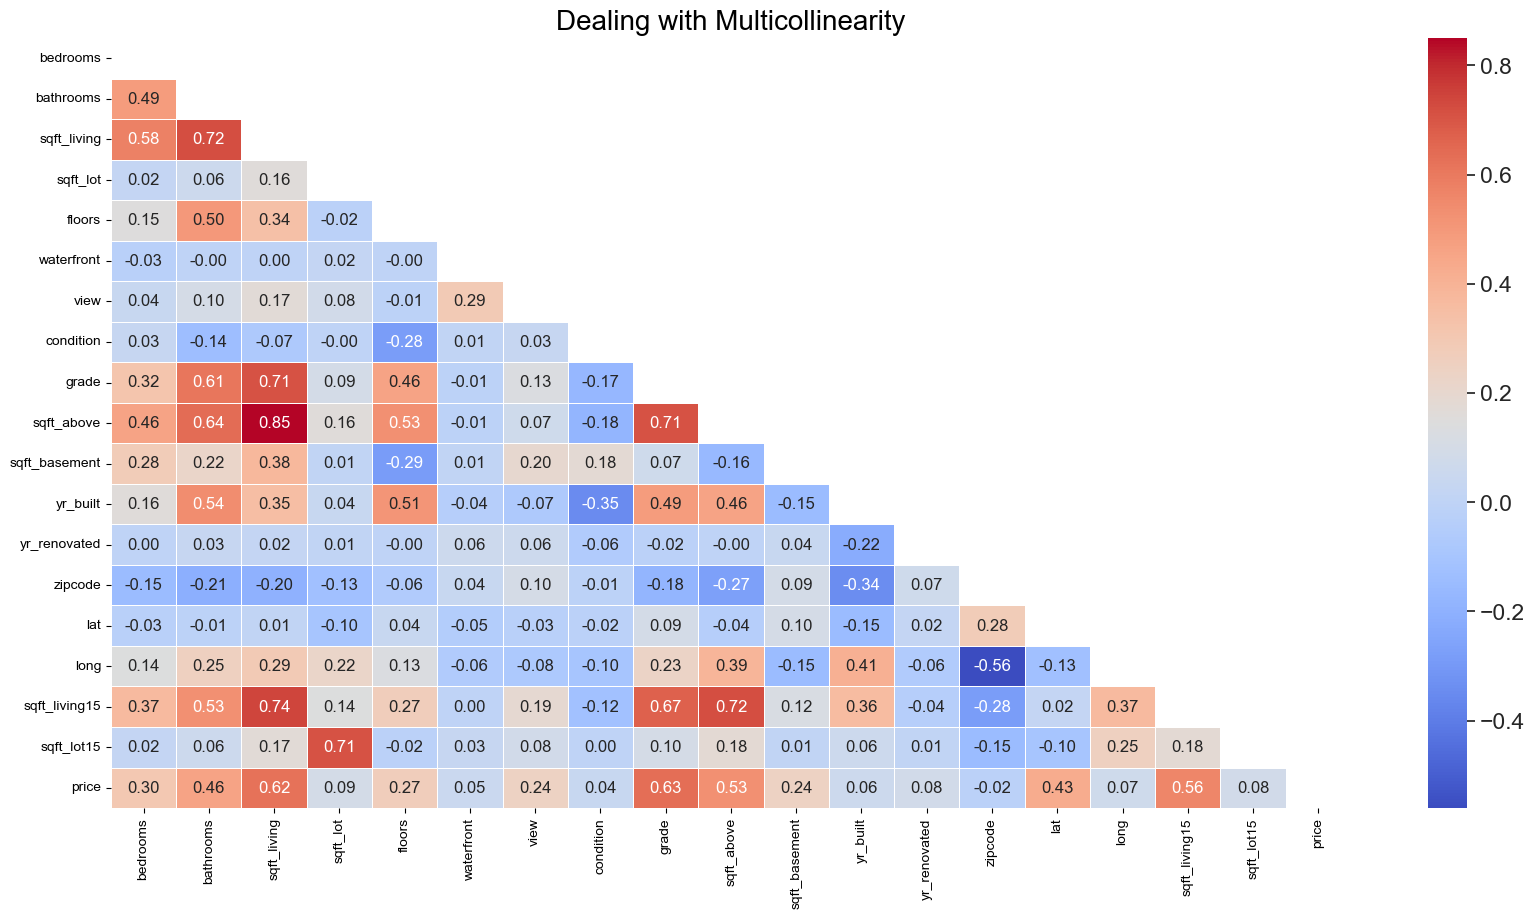

In [24]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) 
plt.show()

<h2 style="color: #9370DB;"> 04 | 💾 Data Processing </h2>

<h3 style="color: #4169E1;"> 4.1 | X-Y Split</h3>

In [25]:
# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [26]:
X = df.drop("price", axis=1)
y = df["price"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 20467.
70% for training data: 14326.
30% for test data: 6141.


<h3 style="color: #4169E1;"> 4.2 | Selecting the Model</h3>

<h4 style="color: #00BFFF;"> 4.2.1 | Selecting Model: Linear Regression </h4>

In [29]:
# Train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
# Make predictions on the test dataset
predictions = model.predict(X_test)
predictions

array([636703.25156245, 233443.56684891, 303770.54338724, ...,
       414671.7940073 , 517240.19499108, 648472.78064987])

In [31]:
# Make a dataframe to compare
eval_df = pd.DataFrame({"actual":y_test,"pred":predictions}).round(2)
eval_df

,actual,pred
id,,
6190700284,420000.0,636703.25
3623029034,230000.0,233443.57
5113200310,270000.0,303770.54
7010700660,807000.0,580004.40
4222200280,225000.0,263840.63
...,...,...
3558000170,329950.0,296287.03
1254200045,635000.0,636708.89
8731800300,299000.0,414671.79


In [32]:
# Calculate the difference. 
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head()

,actual,pred,dif
id,,,
6190700284,420000.0,636703.25,216703.25
3623029034,230000.0,233443.57,3443.57
5113200310,270000.0,303770.54,33770.54
7010700660,807000.0,580004.40,226995.60
4222200280,225000.0,263840.63,38840.63


In [33]:
r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.6876
RMSE =  114734.8636
MSE =   13164088922.1654
MAE =  86498.8234


<h4 style="color: #00BFFF;"> 4.2.2 | Selecting Model: Ridge Regression </h4>

In [35]:
from sklearn.linear_model import Ridge

In [36]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [37]:
predictions_ridge = ridge.predict(X_test)

In [38]:
r2_3_2 = r2_score(y_test, predictions_ridge)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
#Printing the results
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("MSE", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.6876
RMSE =  114730.5247
MSE 13163093297.2101
MAE =  86492.0681


<h4 style="color: #00BFFF;"> 4.2.3 | Selecting Model: Lasso Regression </h4>

In [40]:
from sklearn.linear_model import Lasso


In [41]:
lasso = Lasso()
lasso.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.570e+13, tolerance: 6.297e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [42]:
predictions_lasso = lasso.predict(X_test)

In [43]:
r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_3_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
#Printing the results
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("The value of the metric MSE is ", round(MSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))

R2 =  0.6876
RMSE =  114734.1369
The value of the metric MSE is  13163922170.4743
MAE =  86497.7775


<h4 style="color: #00BFFF;"> 4.2.4 | Selecting Model: Decision Tree Regression </h4>

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [47]:
predictions_tree = tree.predict(X_test)

In [48]:
r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_3_4 = mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [49]:
#Printing the results
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("The value of the metric MSE is ", round(MSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.7181
RMSE =  108996.8418
The value of the metric MSE is  11880311529.0528
MAE =  75203.5875


<h4 style="color: #00BFFF;"> 4.2.5 | Selecting Model: KNN Regression </h4>

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [52]:
predictions_knn = knn.predict(X_test)

In [53]:
r2_3_5 = r2_score(y_test, predictions_knn)
RMSE_3_5 = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_3_5 = mean_squared_error(y_test, predictions_knn)
MAE_3_5 = mean_absolute_error(y_test, predictions_knn)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [54]:
#Printing the results
print("R2 = ", round(r2_3_5, 4))
print("RMSE = ", round(RMSE_3_5, 4))
print("The value of the metric MSE is ", round(MSE_3_5, 4))
print("MAE = ", round(MAE_3_5, 4))

R2 =  0.4022
RMSE =  158722.882
The value of the metric MSE is  25192953263.095
MAE =  122012.5407


<h4 style="color: #00BFFF;"> 4.2.6 | Selecting Model: XGBoost Regression </h4>

In [55]:
import xgboost as xgb

In [56]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [57]:
predictions_xgb = xgbr.predict(X_test)

In [58]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [59]:
#Printing the results
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.7773
RMSE =  96876.4338
The value of the metric MSE is  9385043434.522
MAE =  69705.7311


<h3 style="color: #4169E1;"> 4.3 | Final Comparision</h3>

In [60]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2_3, r2_3_2, r2_3_3, r2_3_4, r2_3_5, r2_3_6],
    'RMSE': [RMSE_3, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5, RMSE_3_6],
    'MSE': [MSE_3, MSE_3_2, MSE_3_3, MSE_3_4, MSE_3_5, MSE_3_6],
    'MAE': [MAE_3, MAE_3_2, MAE_3_3, MAE_3_4, MAE_3_5, MAE_3_6]
}

In [61]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T.round(2)

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,6.900000e-01,6.900000e-01,6.900000e-01,7.200000e-01,4.000000e-01,7.800000e-01
RMSE,1.147349e+05,1.147305e+05,1.147341e+05,1.089968e+05,1.587229e+05,9.687643e+04
MSE,1.316409e+10,1.316309e+10,1.316392e+10,1.188031e+10,2.519295e+10,9.385043e+09
MAE,8.649882e+04,8.649207e+04,8.649778e+04,7.520359e+04,1.220125e+05,6.970573e+04


In [62]:
df_metrics.round(4)

,Model,R²,RMSE,MSE,MAE
0,Linear Regression,0.6876,114734.8636,1.316409e+10,86498.8234
1,Ridge,0.6876,114730.5247,1.316309e+10,86492.0681
2,Lasso,0.6876,114734.1369,1.316392e+10,86497.7775
3,Decision Tree,0.7181,108996.8418,1.188031e+10,75203.5875
4,KNN,0.4022,158722.8820,2.519295e+10,122012.5407
5,XGBoost,0.7773,96876.4338,9.385043e+09,69705.7311


<h2 style="color: #9370DB;"> 05 | Improving Model </h2>

<h3 style="color: #4169E1;"> 5.1 | Normalization with MinMaxScaler</h3>

In [63]:
from sklearn.preprocessing import MinMaxScaler 

In [64]:
scaler = MinMaxScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

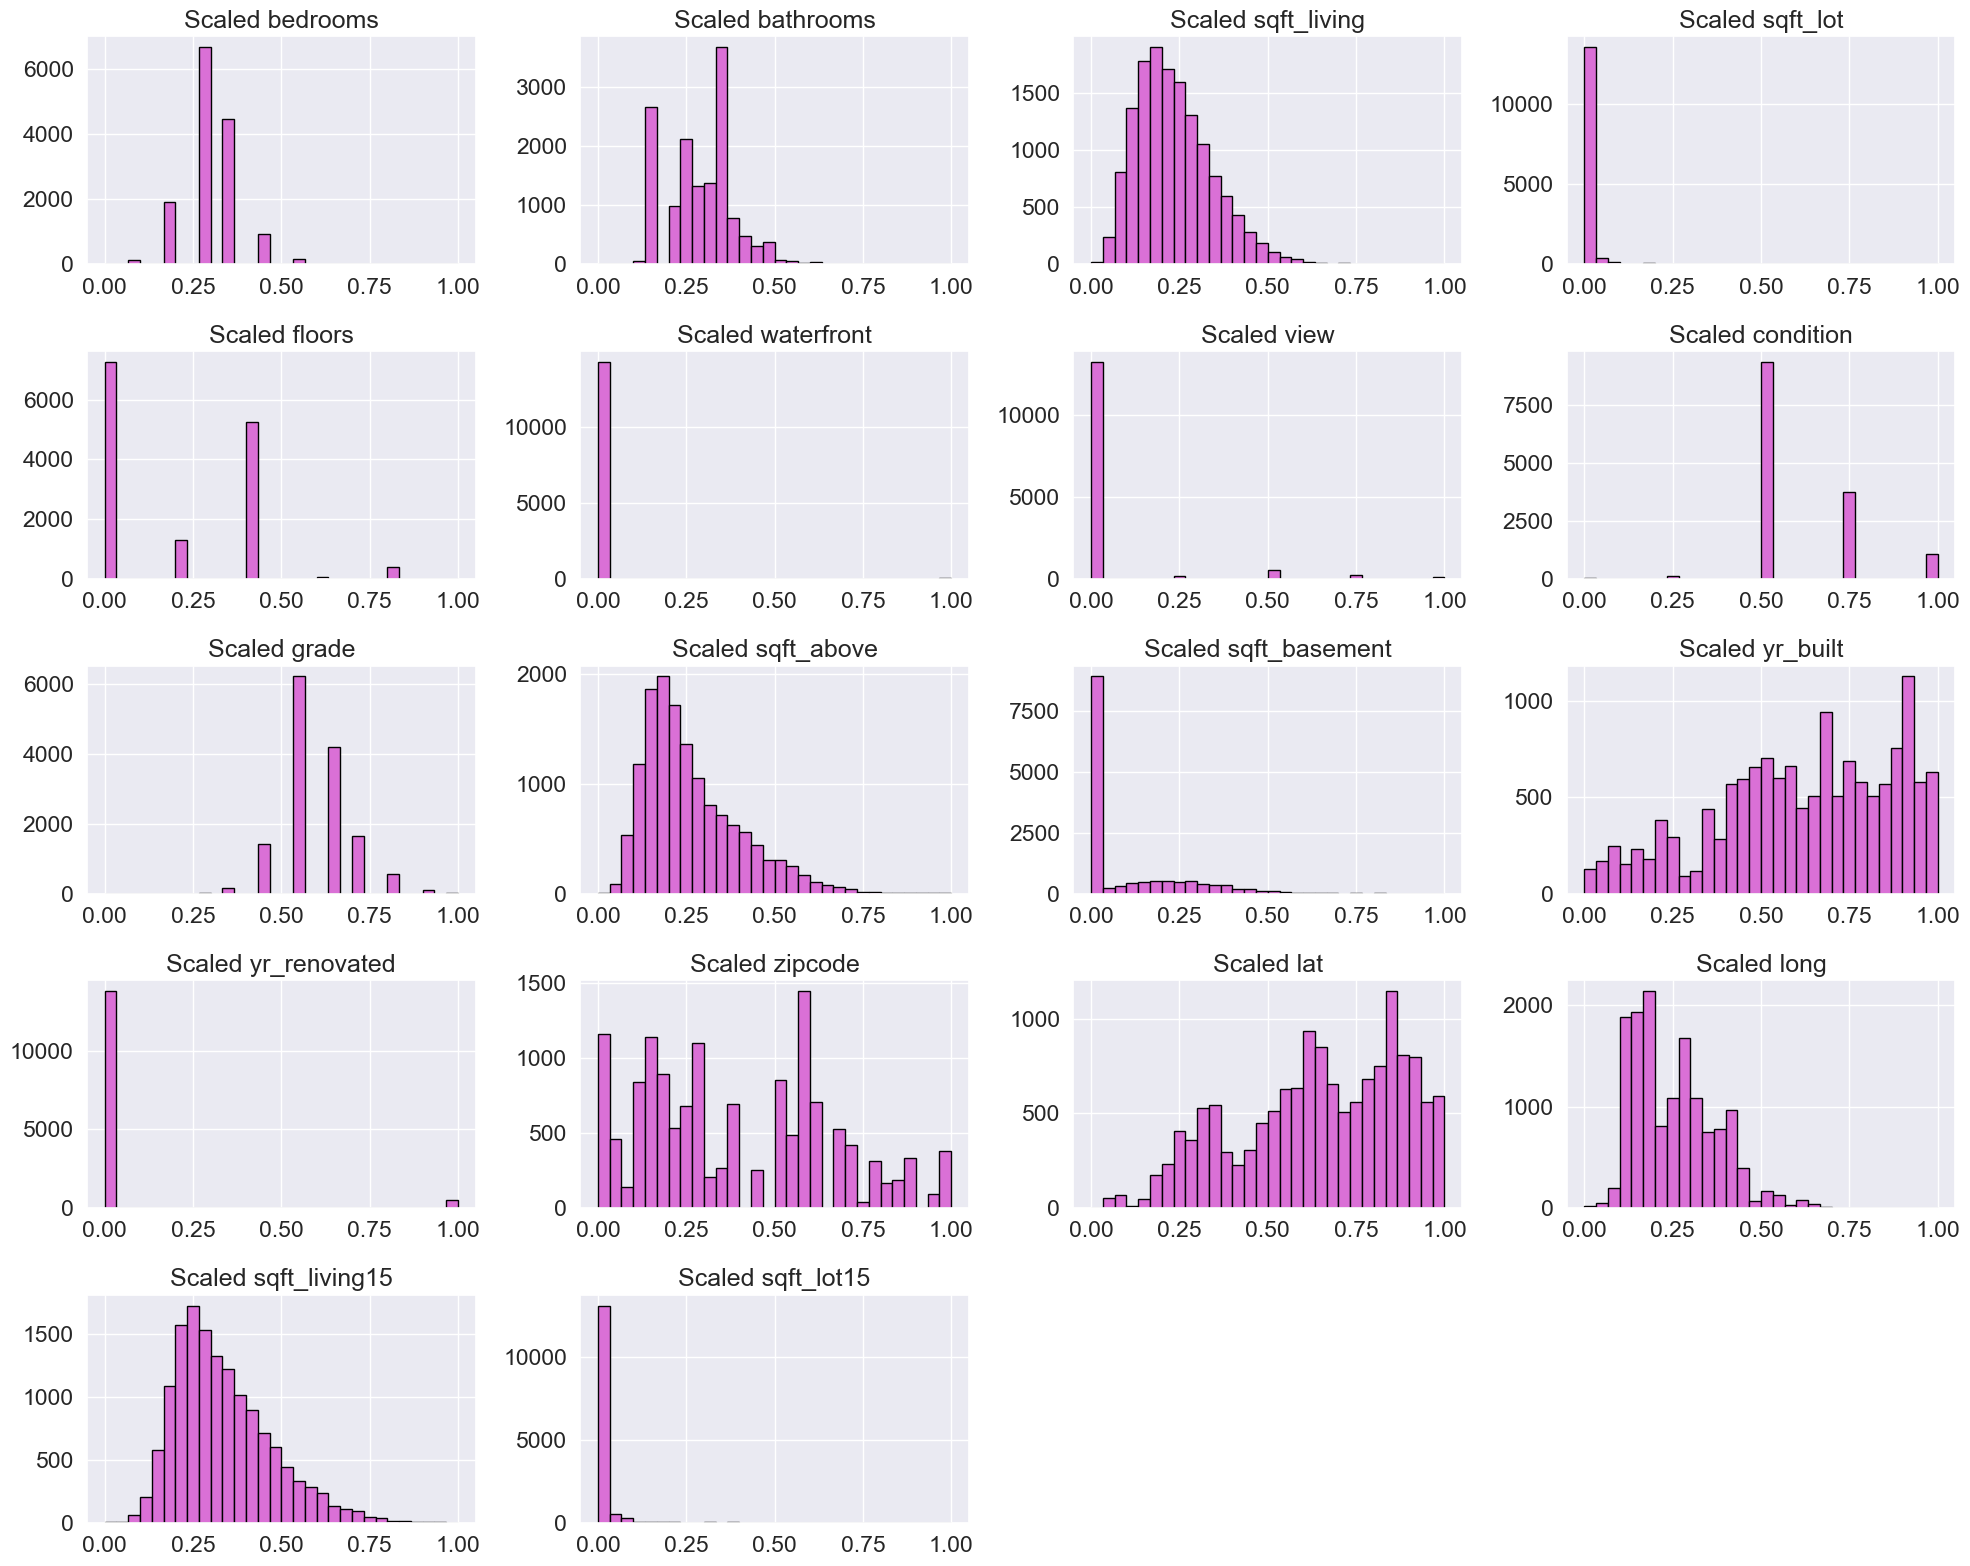

In [66]:
color = '#DA70D6'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Scaled {df.columns[i]}')

plt.tight_layout()
plt.show()

In [67]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [68]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.866
RMSE =  75133.3957
The value of the metric MSE is  5645027156.5862
MAE =  52630.78


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<h3 style="color: #4169E1;"> 5.2 | Standardization with StandardScaler</h3>

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_3 = xgbr.predict(X_test_scaled)

In [72]:
r2_3_7 = r2_score(y_test, predictions_xgb_3)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_3, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_3)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_3)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.866
RMSE =  75133.3957
The value of the metric MSE is  5645027156.5862
MAE =  52630.78


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


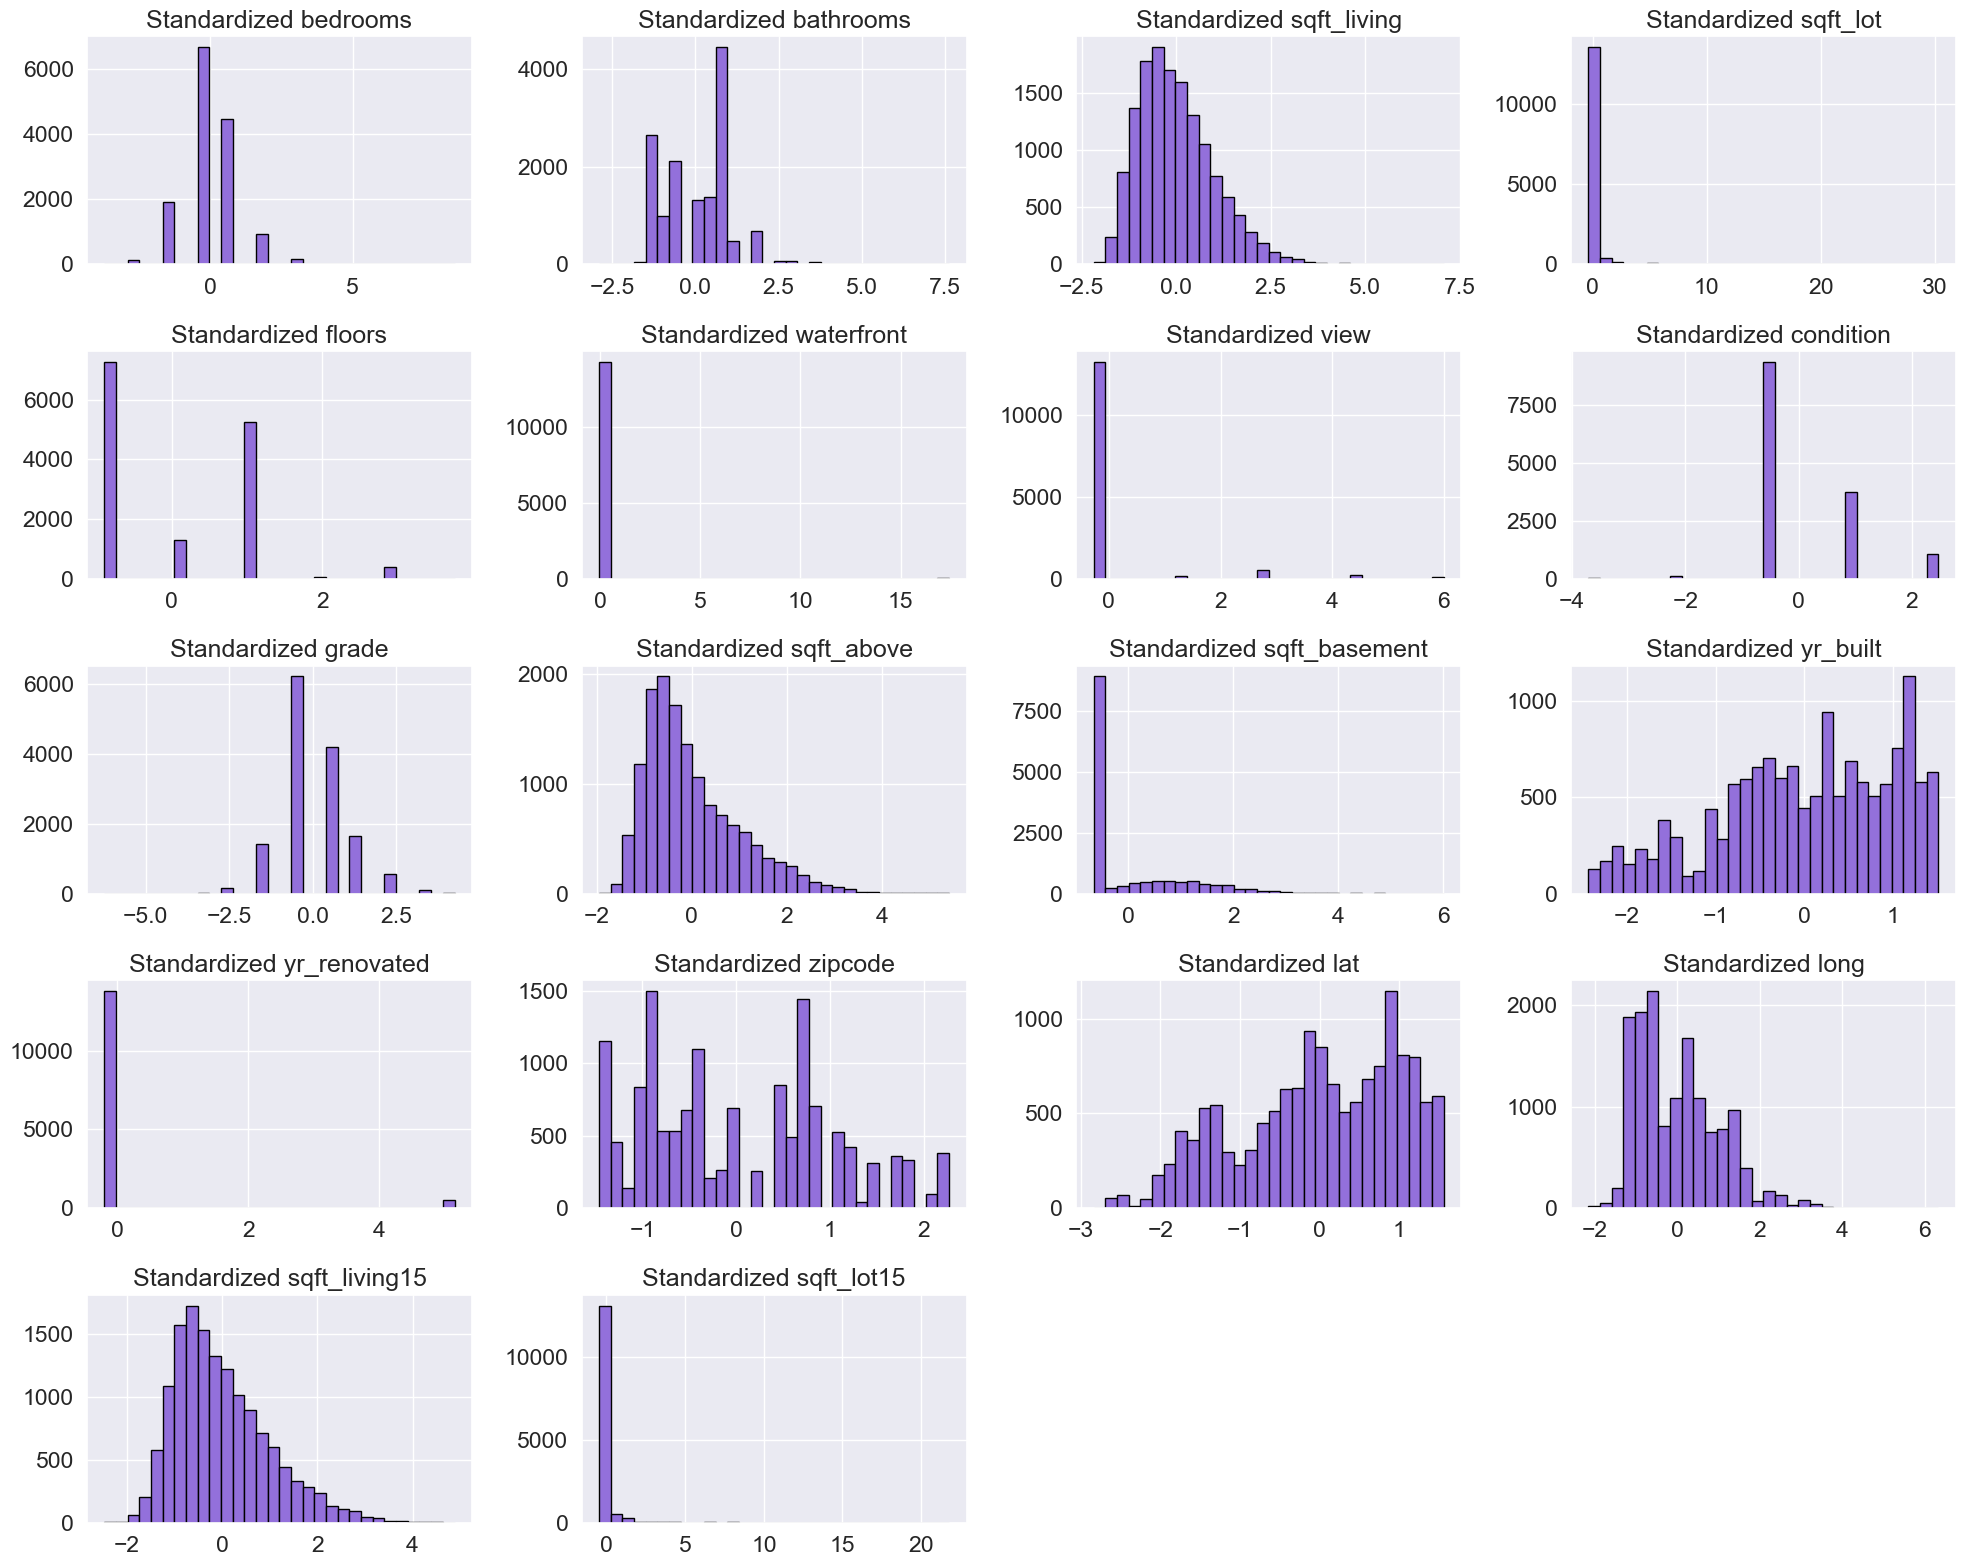

In [73]:
color = '#9370DB'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Standardized {df.columns[i]}')

plt.tight_layout()
plt.show()

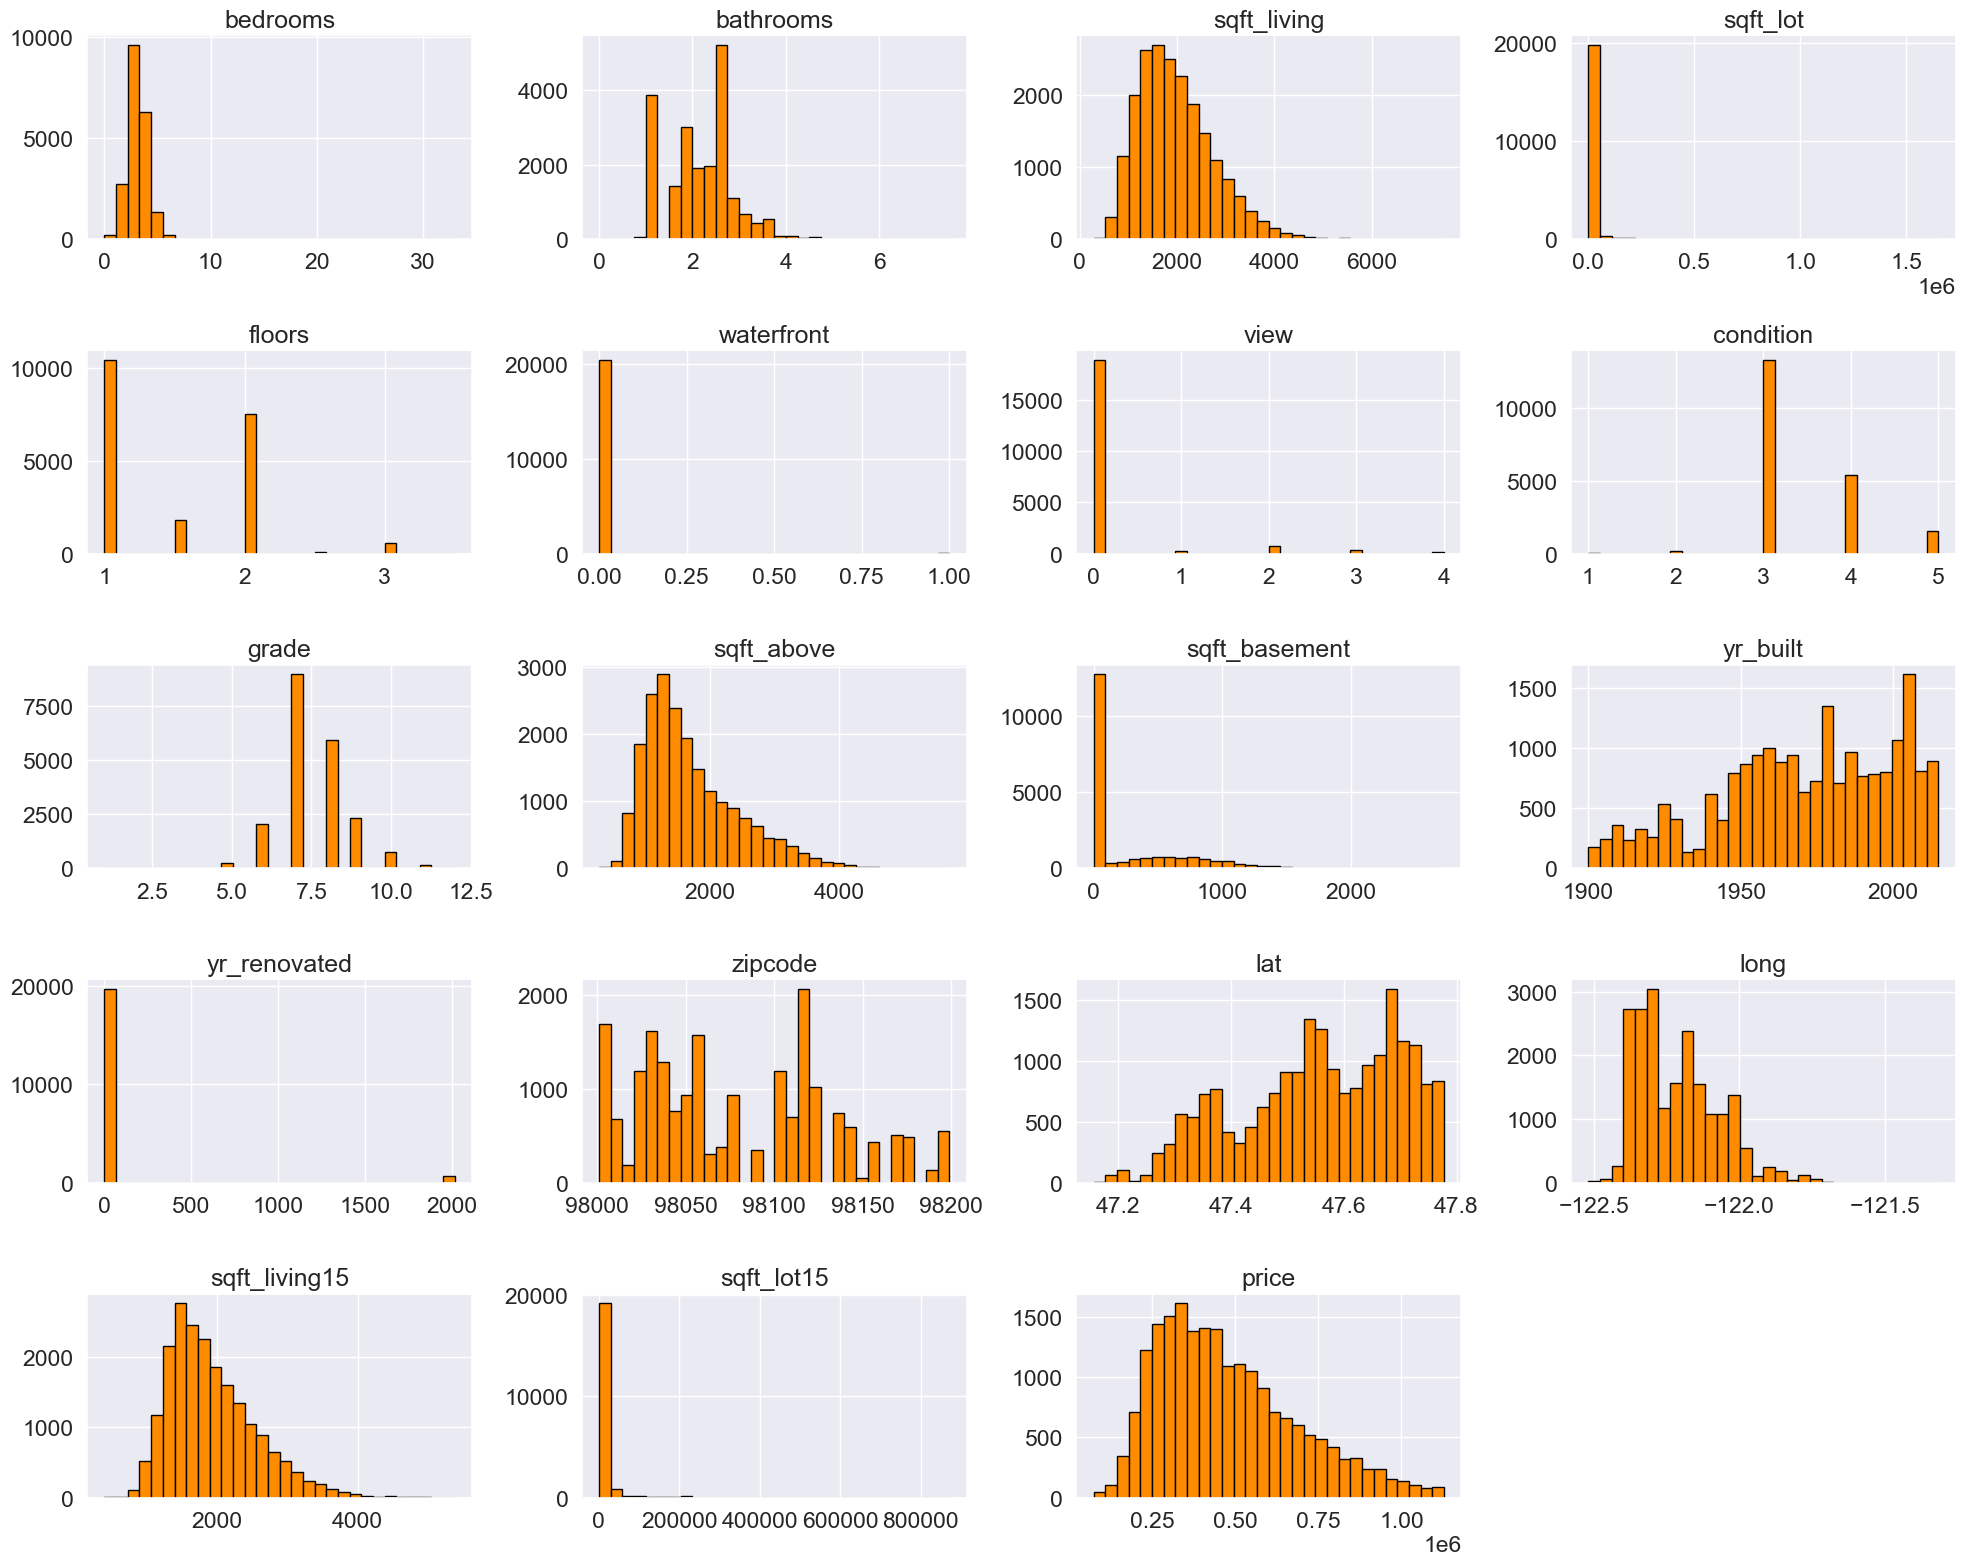

In [74]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

In [75]:
df.corrwith(df["price"]).sort_values(ascending=False)

price            1.000000
grade            0.631182
sqft_living      0.622333
sqft_living15    0.562090
sqft_above       0.530451
bathrooms        0.455927
lat              0.430762
bedrooms         0.296956
floors           0.273987
view             0.238268
sqft_basement    0.235701
sqft_lot         0.093950
yr_renovated     0.083601
sqft_lot15       0.082420
long             0.070863
yr_built         0.061144
waterfront       0.051449
condition        0.038275
zipcode         -0.018511
dtype: float64

<h3 style="color: #4169E1;"> 5.3 | Normzalization with Long Transform</h3>

In [ ]:
#X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
#X_test_log = np.log1p(X_test)

In [ ]:
#xgbr.fit(X_train_log, y_train)
#predictions_xgb_2 = xgbr.predict(X_test_log)

In [ ]:
#r2_3_7 = r2_score(y_test, predictions_xgb_2)
#RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
#MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
#MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
#print("R2 = ", round(r2_3_7, 4))
#print("RMSE = ", round(RMSE_3_7, 4))
#print("The value of the metric MSE is ", round(MSE_3_7, 4))
#print("MAE = ", round(MAE_3_7, 4))

<h2 style="color: #9370DB;"> 05 | Reporting </h2>

In [77]:
eval_df = pd.DataFrame({"actual":y_test,"pred":predictions_xgb}).round(2)
eval_df

,actual,pred
id,,
6190700284,420000.0,546124.18750
3623029034,230000.0,358960.53125
5113200310,270000.0,277820.00000
7010700660,807000.0,631273.12500
4222200280,225000.0,253684.59375
...,...,...
3558000170,329950.0,303878.15625
1254200045,635000.0,706124.50000
8731800300,299000.0,300517.37500


In [81]:
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head().round(2)

,actual,pred,dif
id,,,
6190700284,420000.0,546124.18750,126124.19
3623029034,230000.0,358960.53125,128960.53
5113200310,270000.0,277820.00000,7820.00
7010700660,807000.0,631273.12500,175726.88
4222200280,225000.0,253684.59375,28684.59


In [ ]:
#MinMax BEST
eval_df2 = pd.DataFrame({"actual":y_test,"pred":predictions_xgb_2}).round(2)
eval_df2

,actual,pred
id,,
6190700284,420000.0,508214.531250
3623029034,230000.0,318901.187500
5113200310,270000.0,259218.421875
7010700660,807000.0,815220.375000
4222200280,225000.0,231642.125000
...,...,...
3558000170,329950.0,313548.875000
1254200045,635000.0,702684.750000
8731800300,299000.0,269409.250000


In [80]:
eval_df2["dif"] = abs(eval_df2["actual"]-eval_df2["pred"])
eval_df2.head().round(2)

,actual,pred,dif
id,,,
6190700284,420000.0,508214.531250,88214.53
3623029034,230000.0,318901.187500,88901.19
5113200310,270000.0,259218.421875,10781.58
7010700660,807000.0,815220.375000,8220.38
4222200280,225000.0,231642.125000,6642.12


In [79]:
#StandardScler
eval_df3 = pd.DataFrame({"actual":y_test,"pred":predictions_xgb_3}).round(2)
eval_df3

,actual,pred
id,,
6190700284,420000.0,508214.531250
3623029034,230000.0,318901.187500
5113200310,270000.0,259218.421875
7010700660,807000.0,815220.375000
4222200280,225000.0,231642.125000
...,...,...
3558000170,329950.0,313548.875000
1254200045,635000.0,702684.750000
8731800300,299000.0,269409.250000


In [82]:
eval_df3["dif"] = abs(eval_df3["actual"]-eval_df3["pred"])
eval_df3.head().round(2)

,actual,pred,dif
id,,,
6190700284,420000.0,508214.531250,88214.53
3623029034,230000.0,318901.187500,88901.19
5113200310,270000.0,259218.421875,10781.58
7010700660,807000.0,815220.375000,8220.38
4222200280,225000.0,231642.125000,6642.12


In [ ]:
predictions_xgb_2

In [ ]:
# Make a dataframe to compare
eval_df2 = pd.DataFrame({"actual":y_test,"pred":predictions_xgb}).round(2)
eval_df2

In [ ]:
eval_df2["dif"] = abs(eval_df2["actual"]-eval_df2["pred"])
eval_df2.head().round(2)

In [ ]:
scatter_color = "#9370DB"
line_color = "#9932CC"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()